In [1]:
# Setup

import os
import tensorflow as tf
import numpy as np
import logging
import matplotlib.pylab as plt

logging.getLogger('tensorflow').setLevel(logging.ERROR)
os.environ["KMP_AFFINITY"] = "noverbose"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.autograph.set_verbosity(3)

np.set_printoptions(suppress=True)

In [2]:
# DATA
import python_data.x0_y0_z0 as a

import python_data.x30_y0_z0 as b # 30, 0, 0
import python_data.x_neg_30_y0_z0 as c # -30, 0, 0

import python_data.x60_y0_z0 as d # 60, 0, 0
import python_data.x_neg_60_y0_z0 as e # -60, 0, 0

import python_data.x45_y0_z0 as f # 45, 0, 0
    
corner_points = np.empty((0,8), float)
corner_points =  np.append(corner_points, a.corner_points, axis=0) #a

corner_points =  np.append(corner_points, b.corner_points, axis=0) #b
# corner_points =  np.append(corner_points, c.corner_points, axis=0) #c

corner_points =  np.append(corner_points, d.corner_points, axis=0) #d
# corner_points =  np.append(corner_points, e.corner_points, axis=0) #e

corner_points = np.append(corner_points, f.corner_points, axis=0)

print(corner_points.shape)

answers = np.empty((0,3), float)
answers = np.append(answers, a.answers,axis=0)
answers = np.append(answers, b.answers,axis=0)
# answers = np.append(answers, c.answers,axis=0)
answers = np.append(answers, d.answers,axis=0)
# answers = np.append(answers, e.answers,axis=0)
answers = np.append(answers, f.answers,axis=0)


print(answers.shape)

(1672, 8)
(1672, 3)


Epoch 1/1000
53/53 [==============================] - 1s 2ms/step - loss: 527.8063
Epoch 2/1000
53/53 [==============================] - 0s 2ms/step - loss: 334.5096
Epoch 3/1000
53/53 [==============================] - 0s 2ms/step - loss: 142.4958
Epoch 4/1000
53/53 [==============================] - 0s 2ms/step - loss: 140.6670
Epoch 5/1000
53/53 [==============================] - 0s 2ms/step - loss: 139.7100
Epoch 6/1000
53/53 [==============================] - 0s 2ms/step - loss: 138.9011
Epoch 7/1000
53/53 [==============================] - 0s 2ms/step - loss: 138.4936
Epoch 8/1000
53/53 [==============================] - 0s 2ms/step - loss: 137.6320
Epoch 9/1000
53/53 [==============================] - 0s 3ms/step - loss: 136.4335
Epoch 10/1000
53/53 [==============================] - 0s 4ms/step - loss: 136.2299
Epoch 11/1000
53/53 [==============================] - 0s 2ms/step - loss: 134.8423
Epoch 12/1000
53/53 [==============================] - 0s 2ms/step - loss: 133.7241
E

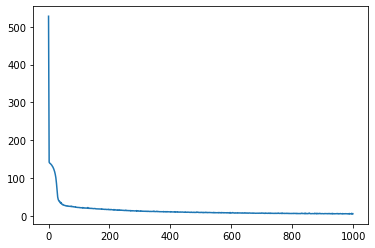

In [3]:
# Model Setup
# import training_data as data


model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(8,)),
    tf.keras.layers.Normalization(axis=None),
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=3,)
                             ])

model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.0002))



history = model.fit(corner_points, answers, epochs=1000, verbose=1)

print("Finished training the model")
# plt.xlabel('Epoch Number')
# plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])
print(history.history['loss'][-1])
# print(model.predict([0, 0, 1,1,2,2,3,3]))

In [6]:
#Test Data 
testPoints = np.array([
    #D(0°, 0°, 0°) 
    [0.0, 0.0, 1.0126999616622925, 0.012500000186264515, 1.0, 1.0, -0.01269999984651804, 0.987500011920929],
    [0.0, 0.0, 1.0180000066757202, -0.012199999764561653, 1.0, 1.0, -0.03590000048279762, 1.0],
    
    #D(30°, 0°, 0°)  
    [0.0, 0.0, 0.8779000043869019, 0.004999999888241291, 1.0, 1.0, 0.07039999961853027, 1.0198999643325806],
    [0.0, 0.0, 1.0197999477386475, 0.01940000057220459, 1.0, 1.0, -0.15870000422000885, 0.9854000210762024],
    
    #D(45°, 0°, 0°)  
    [0.0, 0.0, 0.8252999782562256, 0.01119999960064888, 1.0, 1.0, 0.044599998742341995, 1.0055999755859375],
    [0.0, 0.0, 1.1720000505447388, 0.045499999076128006, 1.0, 1.0, -0.27959999442100525, 0.9545000195503235],
    
    #D(60, 0°, 0°) 
    [0.0, 0.0, 1.121999979019165, -0.007600000128149986, 1.0, 1.0, -0.27639999985694885, 0.9847999811172485],
    [0.0, 0.0, 0.9266999959945679, 0.009399999864399433, 1.0, 1.0, -0.04670000076293945, 1.0094000101089478],
], dtype=np.float64)

testAnswers = np.array([
    #D( 0°, 0°, 0°) 
    [0, 0, 0], 
    [0, 0, 0], 
    
    #D( 30°, 0°, 0°)  
    [30, 0, 0],
    [30, 0, 0],
    
    #D( 45°, 0°, 0°)  
    [45, 0, 0],
    [45, 0, 0],
    
    #D(-30°, 0°, 0°) 
    [60, 0, 0], 
    [60, 0, 0], 
    
    
    # [0, 30, 0], #D( 0°, 30°, 0°) 
    # [0, 60, 0], #D( 0°, 60°, 0°) 
], dtype=np.float64)

In [17]:
#Testing
# y = 0
# for x in testPoints:
#   p = model.predict(x)
#   prediction = round(p[0][0], 2), round(p[0][1], 2), round(p[0][2], 2)
#   answer = testAnswers[y][0], testAnswers[y][1], testAnswers[y][2]
#   print('Prediction: ' ,prediction )
#   print('Answer    : ' ,answer)
#   print('\n')
#   y = y + 1
  
model.predict([0.0, 0.0, 0.8635, 0.0248, 1.0, 1.0, -0.0273, 0.9851])

1/1 [==============================] - 0s 31ms/step


array([[21.91512   , -0.00154297,  0.01146356]], dtype=float32)